In [ ]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Download image data
(train_digits, train_labels), (test_digits, test_labels) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_digits[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# 56*56 Images

In [ ]:
# train_digits_rescaled=[]
# test_digits_rescaled=[]
# for i in range (train_digits.shape[0]):
#   im=Image.fromarray(train_digits[i])
#   train_digits_rescaled.append(np.array(im.resize((56,56))))

# for i in range (test_digits.shape[0]):
#   im=Image.fromarray(test_digits[i])
#   test_digits_rescaled.append(np.array(im.resize((56,56))))

# train_digits=np.array(train_digits_rescaled)
# test_digits=np.array(test_digits_rescaled)

# 28*28 images

In [ ]:
train_digits_rescaled=[]
test_digits_rescaled=[]
for i in range (train_digits.shape[0]):
  im=Image.fromarray(train_digits[i])
  train_digits_rescaled.append(np.array(im.resize((28,28))))

for i in range (test_digits.shape[0]):
  im=Image.fromarray(test_digits[i])
  test_digits_rescaled.append(np.array(im.resize((28,28))))

train_digits=np.array(train_digits_rescaled)
test_digits=np.array(test_digits_rescaled)

In [ ]:
# Num of Samples = 60000, shape of Image = 28x28 (Height x Width)
train_digits.shape


(60000, 28, 28)

In [ ]:
test_digits.shape

(10000, 28, 28)

#### Dsiplay Image Data

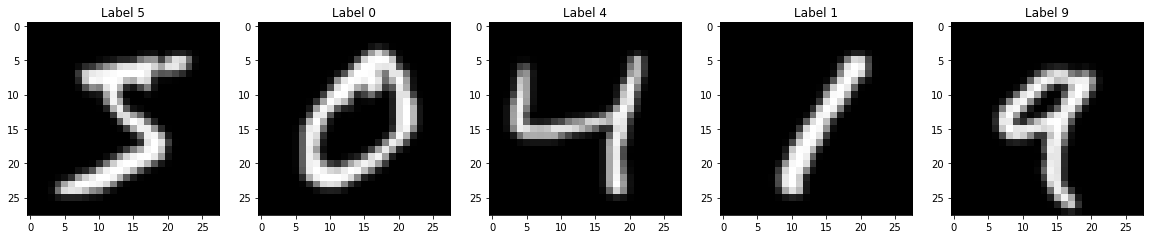

In [ ]:
plt.figure(figsize = (20,4))

for index, (image,label) in enumerate(zip(train_digits[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index+1)
    # This convert arrays into images
    plt.imshow(np.reshape(image, (28,28)), cmap = 'gray')
    plt.title("Label %i" %label, fontsize = 12)

#### Labels

In [ ]:
pd.Series(train_labels).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

#### Reshaping of target into Categorical Data

In [ ]:
# For multi-class use one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_data = train_digits.reshape(60000, 784) # change according to square of input 
test_data = test_digits.reshape(10000, 784)

#### Image Normalization

In [ ]:
train_data1 = train_data.astype('float32') / 255
test_data1 = test_data.astype('float32') / 255

#### Split Data into Train & Validation

In [ ]:
from sklearn.model_selection import train_test_split
train_data2, val_data, train_label1, val_label = train_test_split(train_data1, train_labels_cat, test_size = 0.1, random_state=2)

In [ ]:
train_data2.shape

(54000, 3136)

In [ ]:
train_label1.shape

(54000, 10)

In [ ]:
val_data.shape

(6000, 3136)

#### ANN Classification

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
# Optimizers 
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # Sequential Neural Network - FeedForward NN
    model = Sequential()
    # Units = Num of Neurons(2 * pow(n)), input_shape = number of features.
    model.add(Dense(units = 64, activation = 'relu', input_shape = [train_data2.shape[1]]))
    model.add(Dropout(0.2))
    # Hidden Layer - I
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))
    # Hidden Layer - II
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.2))
    # Output Layer 
    model.add(Dense(units = 10, activation = 'softmax'))
    # Optimizers
    optimizers = Adam(learning_rate = 0.001)
    
    # Model Compiler
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                200768    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

# Results For 28*28 Images

In [ ]:
history = model.fit(train_data2, train_label1, epochs = 50, batch_size = 32, validation_data = (val_data, val_label))

Epoch 1/50
1688/1688 [==============================] - 11s 5ms/step - loss: 0.3845 - accuracy: 0.8810 - val_loss: 0.1659 - val_accuracy: 0.9472
Epoch 2/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2120 - accuracy: 0.9365 - val_loss: 0.1460 - val_accuracy: 0.9563
Epoch 3/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1805 - accuracy: 0.9452 - val_loss: 0.1280 - val_accuracy: 0.9613
Epoch 4/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1607 - accuracy: 0.9517 - val_loss: 0.1106 - val_accuracy: 0.9665
Epoch 5/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1450 - accuracy: 0.9558 - val_loss: 0.0988 - val_accuracy: 0.9708
Epoch 6/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1357 - accuracy: 0.9598 - val_loss: 0.0986 - val_accuracy: 0.9690
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1299 - accuracy: 0.9607 - val_loss: 0.0883 - val_accurac

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.384531,0.880963,0.165906,0.947167
1,0.211968,0.936537,0.146014,0.956333
2,0.180460,0.945204,0.127959,0.961333
3,0.160732,0.951685,0.110637,0.966500
4,0.145004,0.955778,0.098780,0.970833
5,0.135682,0.959759,0.098559,0.969000
6,0.129870,0.960722,0.088303,0.973500
7,0.120532,0.962926,0.091305,0.972000
8,0.114242,0.964741,0.097606,0.973167
9,0.114149,0.966056,0.083742,0.975333


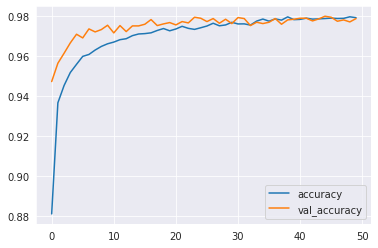

In [ ]:
sns.set_style('darkgrid')
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

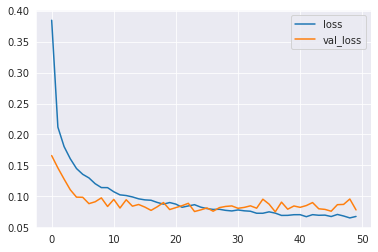

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

# Results For 56*56 Images

In [51]:
history = model.fit(train_data2, train_label1, epochs = 50, batch_size = 32, validation_data = (val_data, val_label))

Epoch 1/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3791 - accuracy: 0.8835 - val_loss: 0.1937 - val_accuracy: 0.9393
Epoch 2/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2264 - accuracy: 0.9319 - val_loss: 0.1473 - val_accuracy: 0.9558
Epoch 3/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1982 - accuracy: 0.9409 - val_loss: 0.1282 - val_accuracy: 0.9625
Epoch 4/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1744 - accuracy: 0.9468 - val_loss: 0.1140 - val_accuracy: 0.9692
Epoch 5/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1627 - accuracy: 0.9515 - val_loss: 0.1081 - val_accuracy: 0.9683
Epoch 6/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1541 - accuracy: 0.9536 - val_loss: 0.1054 - val_accuracy: 0.9667
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1455 - accuracy: 0.9562 - val_loss: 0.1030 - val_accuracy:

In [52]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.379111,0.883482,0.193714,0.939333
1,0.226404,0.931944,0.147274,0.955833
2,0.198189,0.940944,0.128249,0.962500
3,0.174351,0.946833,0.114041,0.969167
4,0.162681,0.951537,0.108144,0.968333
5,0.154063,0.953593,0.105388,0.966667
6,0.145461,0.956222,0.103035,0.971167
7,0.142044,0.957667,0.102210,0.969333
8,0.135552,0.957556,0.097513,0.972833
9,0.132180,0.960352,0.094837,0.972833


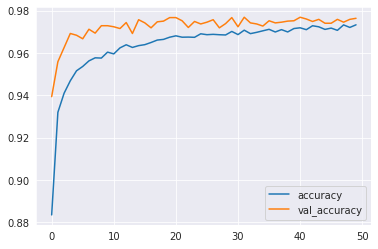

In [53]:
sns.set_style('darkgrid')
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

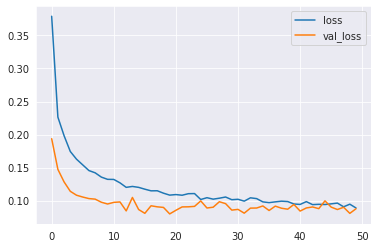

In [54]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

# Observations
1. **Ideally the 56*56 images should take more time to train** as more information has to be processed by the model, but due to input size difference being too small, and having very fast GPU on collab we are not able to see much difference.
2. In terms for graph for loss we can see overfitting happening after a few epochs in 28\*28 images but in case of 56\*56 images we have reached the saturation point still it is not overfitting as val loss is still less than train loss. Similar is the case with accuracy graph. **Hence we can easily see and say that accuracy is better in case of 56\*56 images than 28\*28 images with similar parameters.**

